# $MoS_2$ example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
pv.set_jupyter_backend("static")

This cell loads the mean-field wavefunction file `WFN.h5` and extracts the crystal structure using `read_structure`.
We then visualize the atomic positions and unit cell with `plot_structure`, giving a quick overview of the system geometry before moving on to electronic-property analysis.

> Note: To export the structure to a POSCAR file, use `visualizeBGW.io.berkeleygw_exports.export_structure`.

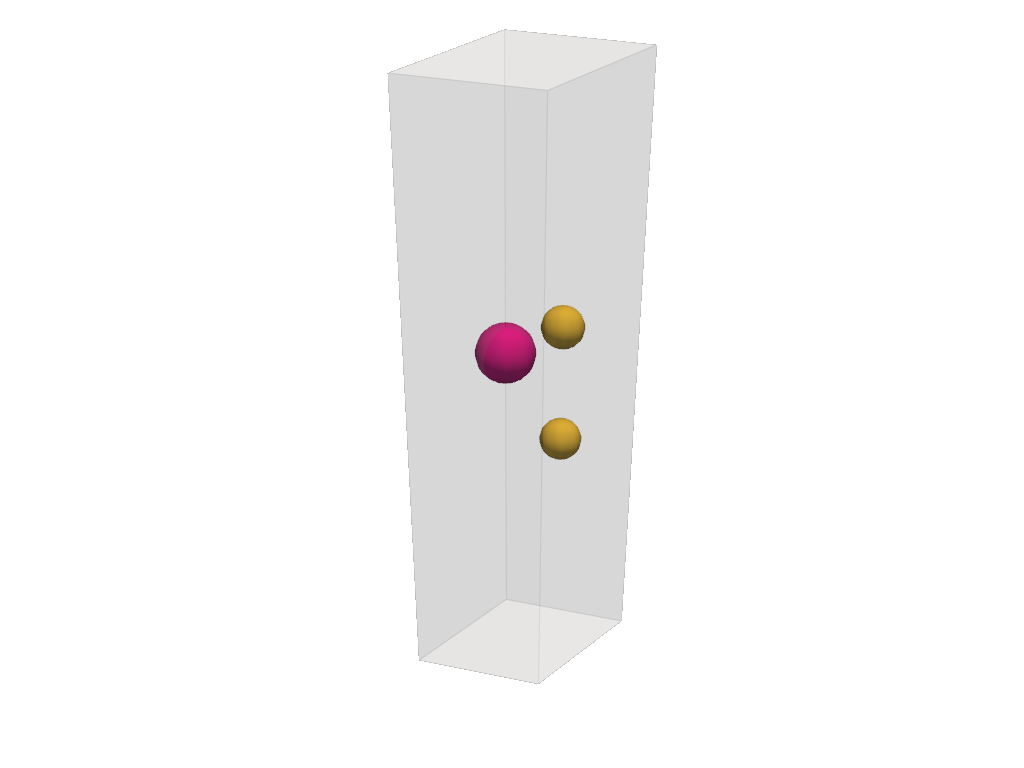

In [2]:
from visualizeBGW.io.berkeleygw_readers import read_structure
from visualizeBGW.plotting.berkeleygw_plots import plot_structure

wfn_file = "02-wfn/WFN.h5"
structure = read_structure(wfn_file)

pl = pv.Plotter()
plot_structure(pl, structure)
pl.show()

The function `calc_rho` evaluates the real-space probability density $|\psi_{n,k}(r)|^2$
obtained by Fourier-transforming the BerkeleyGW wavefunction for a selected band $n$ and k-point $k$.
We then pass this density to `plot_proj_wfn`, which renders a 3D PyVista visualization.

Here we examine the top valence band and the bottom conduction band at the $K$ point, where the band gap occurs.
This reveals how the electronic charge associated with each state is distributed in real space, highlighting bonding/antibonding character and the atomic orbitals contributing to the gap.

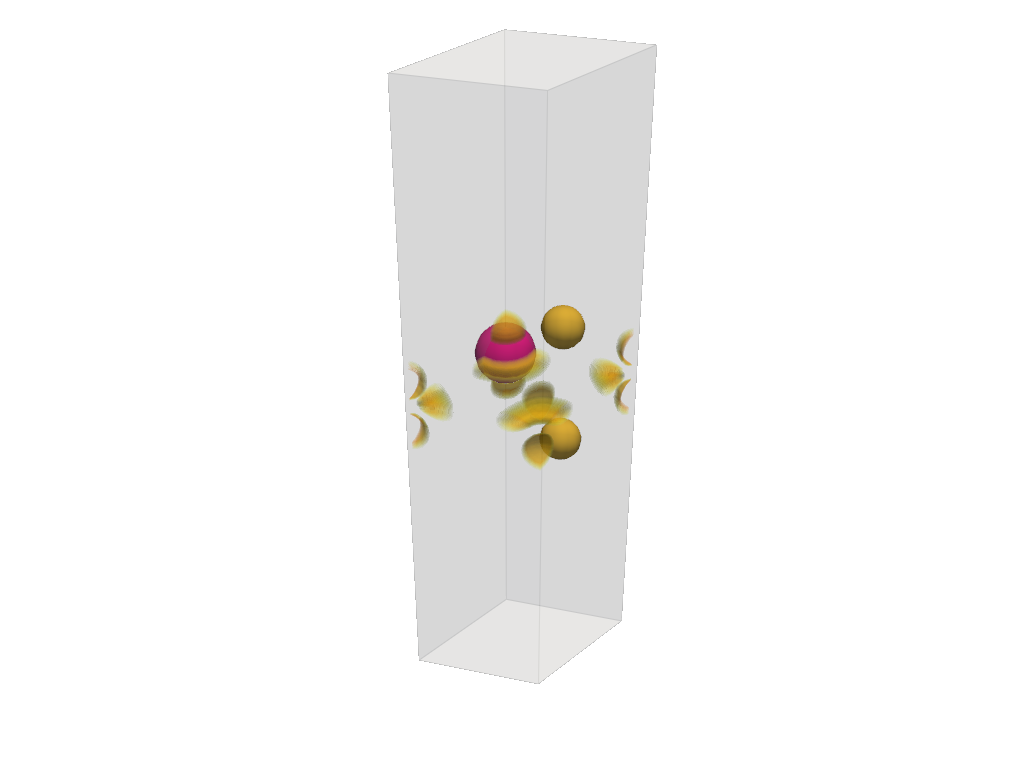

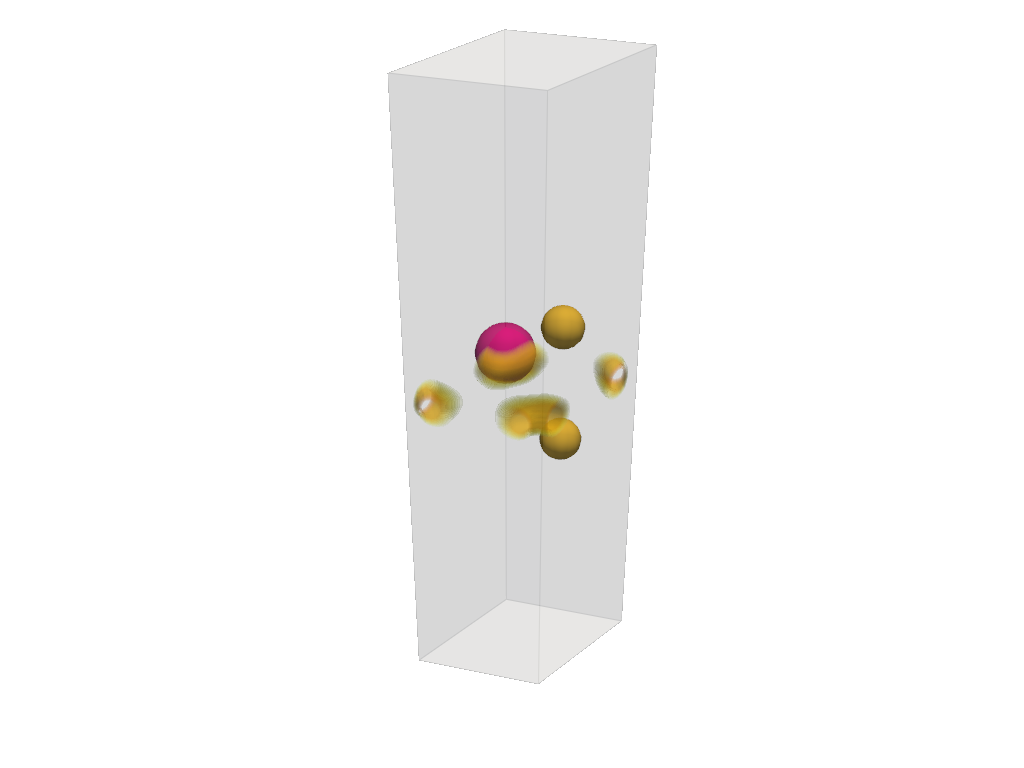

In [3]:
from visualizeBGW.plotting.berkeleygw_plots import plot_proj_wfn
from visualizeBGW.analysis.berkeleygw_processing import calc_rho

K_point = np.array([1/3, 1/3, 0.0])
rho_cb1, mf_header = calc_rho(wfn_file, 0, K_point)
rho_vb1, _ = calc_rho(wfn_file, -1, K_point)

pl = pv.Plotter()
plot_proj_wfn(pl, structure, rho_cb1)
pl.show()

pl = pv.Plotter()
plot_proj_wfn(pl, structure, rho_vb1)
pl.show()

This cell reads `chi_converge.dat` using `read_chi_converge`, which contains the convergence of the dielectric matrix $\chi$ with respect to the number of empty bands.

Physically, $\chi$ determines screening, so convergence testing is essential for reliable GW results.

> Note: These results are underconverged!

In [4]:
from visualizeBGW.io.berkeleygw_readers import read_chi_converge
from visualizeBGW.plotting.berkeleygw_plots import plot_chi_converge

chi_converge_file = "07-epsilon/chi_converge.dat"

chi_data = read_chi_converge(chi_converge_file)
for q in chi_data.keys():
    print(q)

(0.0046294855, 0.0046294855, 0.0)
(0.018517942, 0.018517942, 0.0)
(0.04166537, 0.04166537, 0.0)
(0.0, 0.16666667, 0.0)
(0.0, 0.33333333, 0.0)
(0.0, 0.5, 0.0)
(0.0, 0.66666667, 0.0)
(0.0, 0.83333333, 0.0)
(0.16666667, 0.16666667, 0.0)
(0.16666667, 0.33333333, 0.0)
(0.16666667, 0.5, 0.0)
(0.33333333, 0.33333333, 0.0)


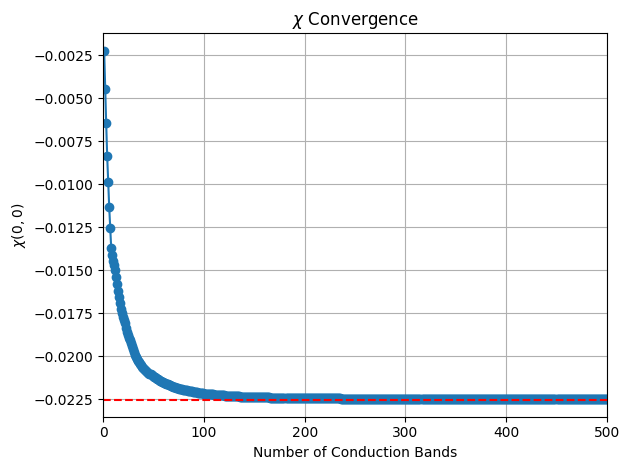

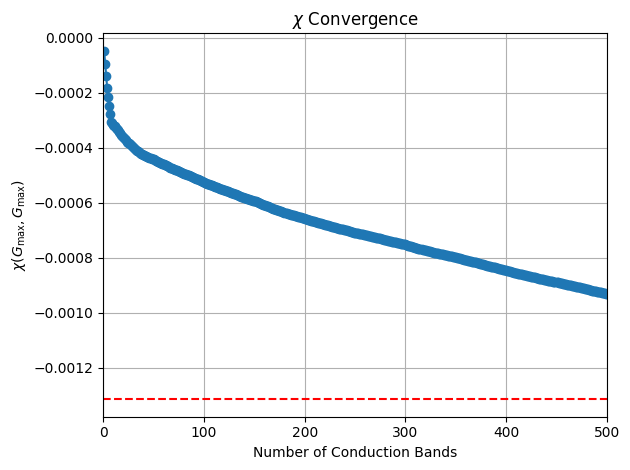

In [5]:
fig, ax = plt.subplots()
plot_chi_converge(ax, chi_data[(0.33333333, 0.33333333, 0.0)], "0")
plt.show()

fig, ax = plt.subplots()
plot_chi_converge(ax, chi_data[(0.33333333, 0.33333333, 0.0)], "Gmax")
plt.show()

This cell loads the Coulomb-hole convergence file `ch_converge.dat` using `read_ch_converge`.
The output shows how the Coulomb-hole (CH) contribution to the GW self-energy evolves as more empty bands are included.
We then plot the CH correction for the VBM, the CBM, and their difference versus the number of bands, allowing us to assess how many states are needed for a well-converged quasiparticle gap.

In [6]:
from visualizeBGW.io.berkeleygw_readers import read_ch_converge
from visualizeBGW.plotting.berkeleygw_plots import plot_ch_convergence

ch_converge_file = "08-sigma/ch_converge.dat"

ch_data = read_ch_converge(ch_converge_file)
for q in ch_data.keys():
    print(q)

(0.0, 0.0, 0.0)
(0.0, 0.166667, 0.0)
(0.0, 0.333333, 0.0)
(0.0, 0.5, 0.0)
(0.0, 0.666667, 0.0)
(0.0, 0.833333, 0.0)
(0.166667, 0.166667, 0.0)
(0.166667, 0.333333, 0.0)
(0.166667, 0.5, 0.0)
(0.333333, 0.333333, 0.0)


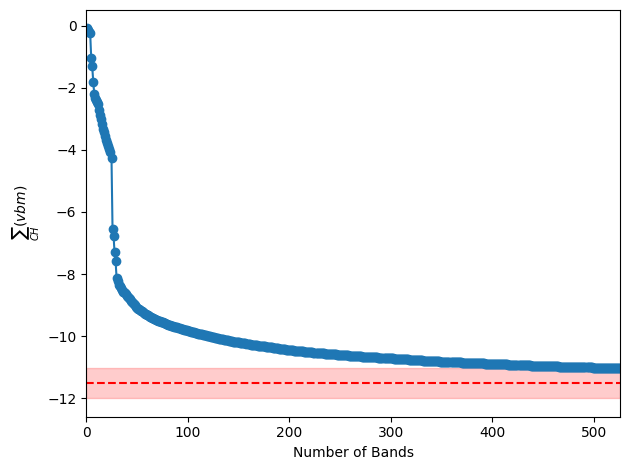

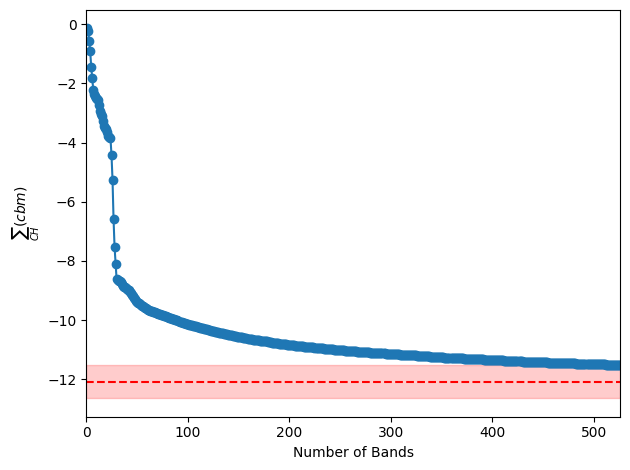

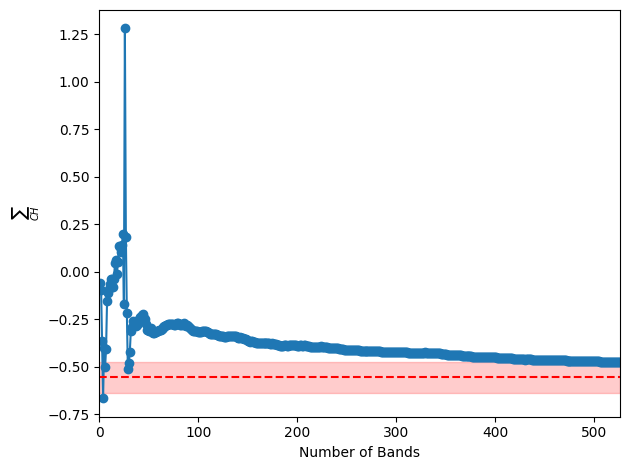

In [7]:
fig, ax = plt.subplots()
plot_ch_convergence(ax, ch_data[(0.333333, 0.333333, 0.0)], "vbm")
plt.show()

fig, ax = plt.subplots()
plot_ch_convergence(ax, ch_data[(0.333333, 0.333333, 0.0)], "cbm")
plt.show()

fig, ax = plt.subplots()
plot_ch_convergence(ax, ch_data[(0.333333, 0.333333, 0.0)], "diff")
plt.show()

This cell reads quasiparticle energies from `eqp.dat` using `read_eqp`, then constructs a high-symmetry k-path ($\Gamma-\Lambda-K-M$).
Using `plot_bandstructure`, we compare the mean-field and GW-corrected band structures.
This shows many-body effects such as bandgap opening and changes in dispersion.

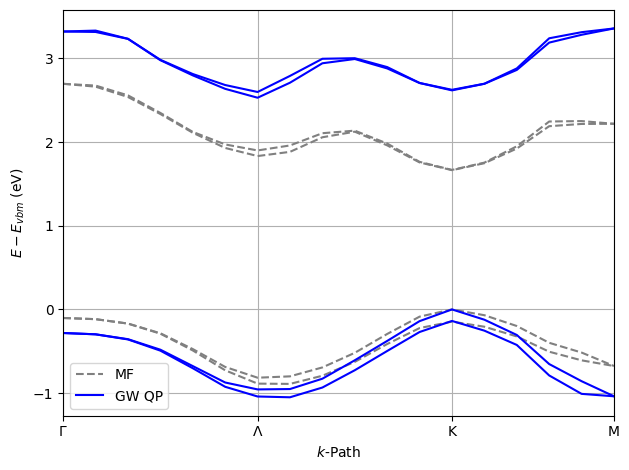

In [8]:
from visualizeBGW.io.berkeleygw_readers import read_eqp
from visualizeBGW.plotting.berkeleygw_plots import plot_bandstructure

eqp_file = "12-absorption/eqp.dat"
kpts, emf, eqp = read_eqp(eqp_file)

hsp = [[r'$\Gamma$', [0.0, 0.0, 0.0]], [r'$\Lambda$', [1/6, 1/6, 0.0]], ['K', [1/3, 1/3, 0.0]], ['M', [0.5, 0.0, 0.0]]]
nv = 2

fig, ax = plt.subplots()
plot_bandstructure(ax, kpts, emf, eqp, hsp, nv, True, True)
plt.show()

This cell reads the head of the dielectric matrix from `eps0mat.h5` and `epsmat.h5` using `get_eps_head`.

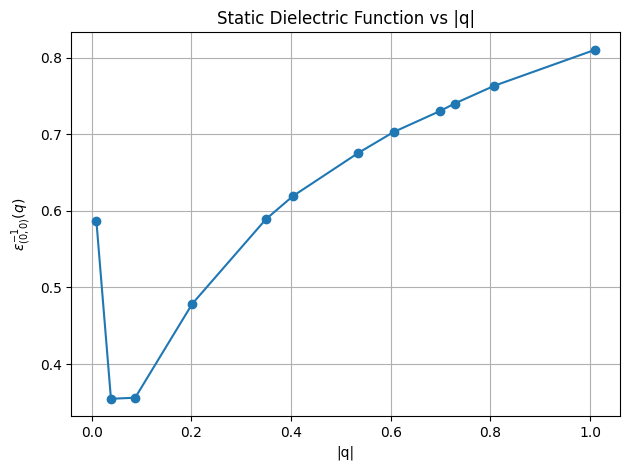

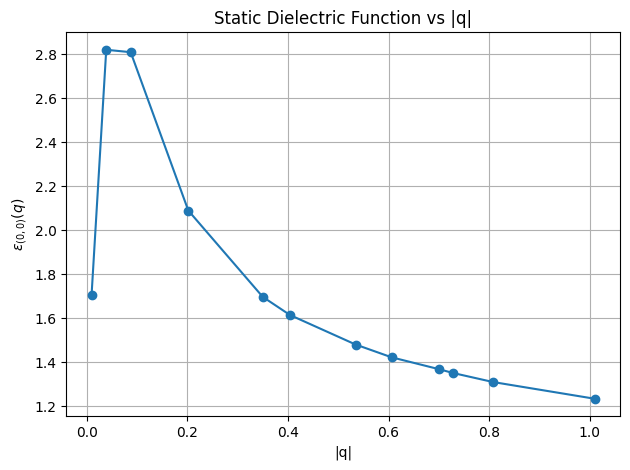

In [9]:
from visualizeBGW.analysis.berkeleygw_processing import get_eps_head
from visualizeBGW.plotting.berkeleygw_plots import plot_eps_head

eps0_file = "07-epsilon/eps0mat.h5"
eps_file = "07-epsilon/epsmat.h5"

epshead0, qlen0 = get_eps_head(eps0_file)
epshead_, qlen_ = get_eps_head(eps_file)

epshead = np.append(epshead0, epshead_)
qlen = np.append(qlen0, qlen_)

fig, ax = plt.subplots()
plot_eps_head(ax, qlen, epshead, True)
plt.show()

fig, ax = plt.subplots()
plot_eps_head(ax, qlen, epshead, False)
plt.show()

This cell loads eigenvalues and the transition matrix elements (velocity or momentum dipoles) from the BerkeleyGW output files.

Using `get_absorption_spectra`, we compute both the BSE absorption spectrum (including electron-hole interactions) and the RPA spectrum (without e-h coupling), while allowing control over the spectral broadening shape.

We then visualize the results with `plot_absorption_spectra`, which makes it easy to compare excitonic effects such as peak shifts, oscillator-strength redistribution, and changes in line shape.

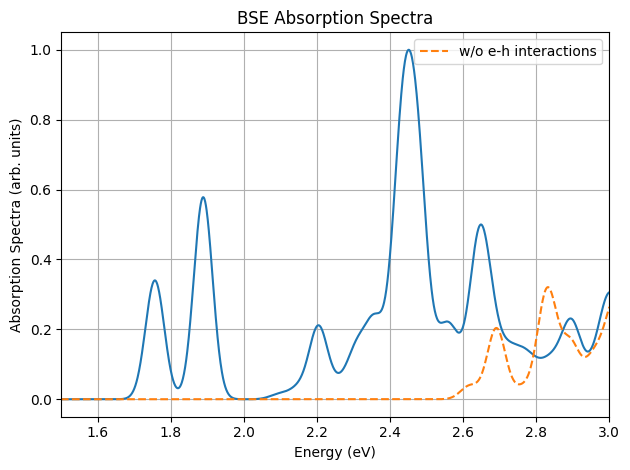

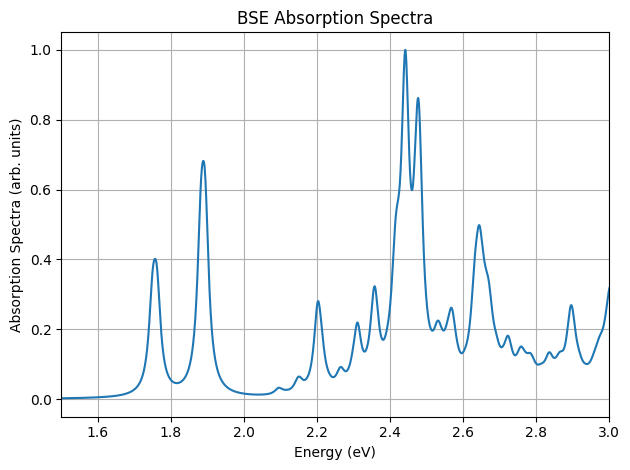

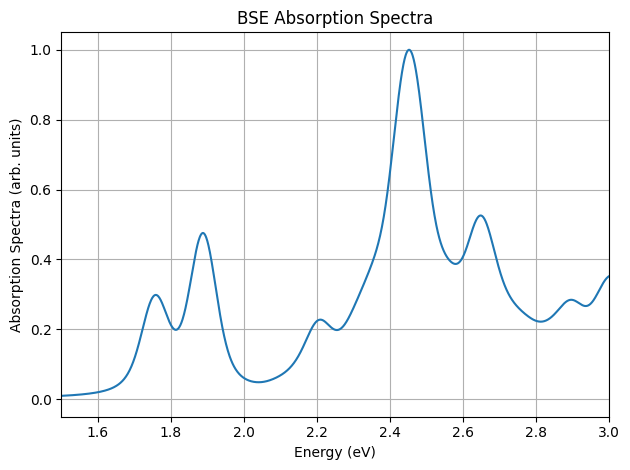

In [10]:
from visualizeBGW.io.berkeleygw_readers import read_eigenvalues_noeh, read_eigenvalues
from visualizeBGW.analysis.berkeleygw_processing import get_absorption_spectra
from visualizeBGW.plotting.berkeleygw_plots import plot_absorption_spectra

eigenvalues_file = "12-absorption/eigenvalues_b1.dat"
eigenvalues_noeh_file = "12-absorption/eigenvalues_b1_noeh.dat"

eigs, dipole = read_eigenvalues(eigenvalues_file)
eigs_noeh, dipole_noeh = read_eigenvalues_noeh(eigenvalues_noeh_file)

broadening = 0.025  # eV

energy, absorption_gaussian = get_absorption_spectra(eigs, dipole, broadening, 'gaussian')
_, absorption_lorentzian = get_absorption_spectra(eigs, dipole, broadening, 'lorentzian')
_, absorption_voigt = get_absorption_spectra(eigs, dipole, broadening, 'voigt')
energy_noeh, absorption_noeh = get_absorption_spectra(eigs_noeh, dipole_noeh, broadening, 'gaussian')

fig, ax = plt.subplots()
plot_absorption_spectra(ax, energy, absorption_gaussian, 1.5, 3.0, energy_noeh, absorption_noeh)
plt.show()

fig, ax = plt.subplots()
plot_absorption_spectra(ax, energy, absorption_lorentzian, 1.5, 3.0)
plt.show()

fig, ax = plt.subplots()
plot_absorption_spectra(ax, energy, absorption_voigt, 1.5, 3.0)
plt.show()

This cell loads exciton eigenvectors from `eigenvectors.h5` using `get_eigenvectors_components`.

For a chosen exciton index, we extract the electron- and hole-resolved band contributions, along with the k-resolved weights that describe where the exciton lives in reciprocal space.

We then generate two types of visualizations:
1. Exciton band contributions and a planar projection of the k-resolved weights using `plot_eigenvector_components`.
2. A full 3D visualization of the exciton distribution in k-space using `plot_eigenvector_k_3d`.

These plots show how strongly each valence–conduction pair contributes to the exciton and whether the exciton is localized around specific high-symmetry valleys in the Brillouin zone.

In this example, we present the two spin-distinct, well-known excitons that contribute to the TMD $A$ peak.

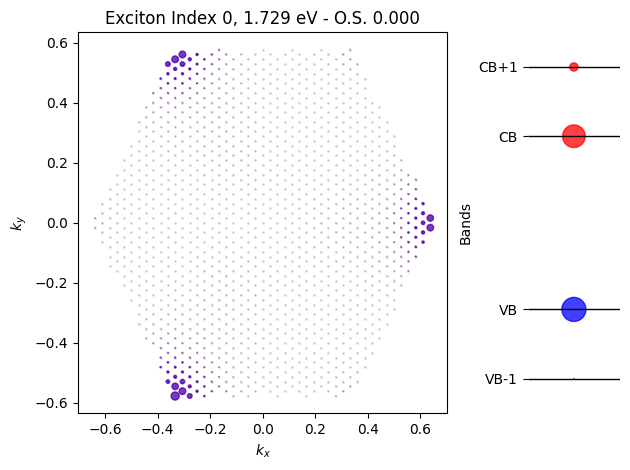

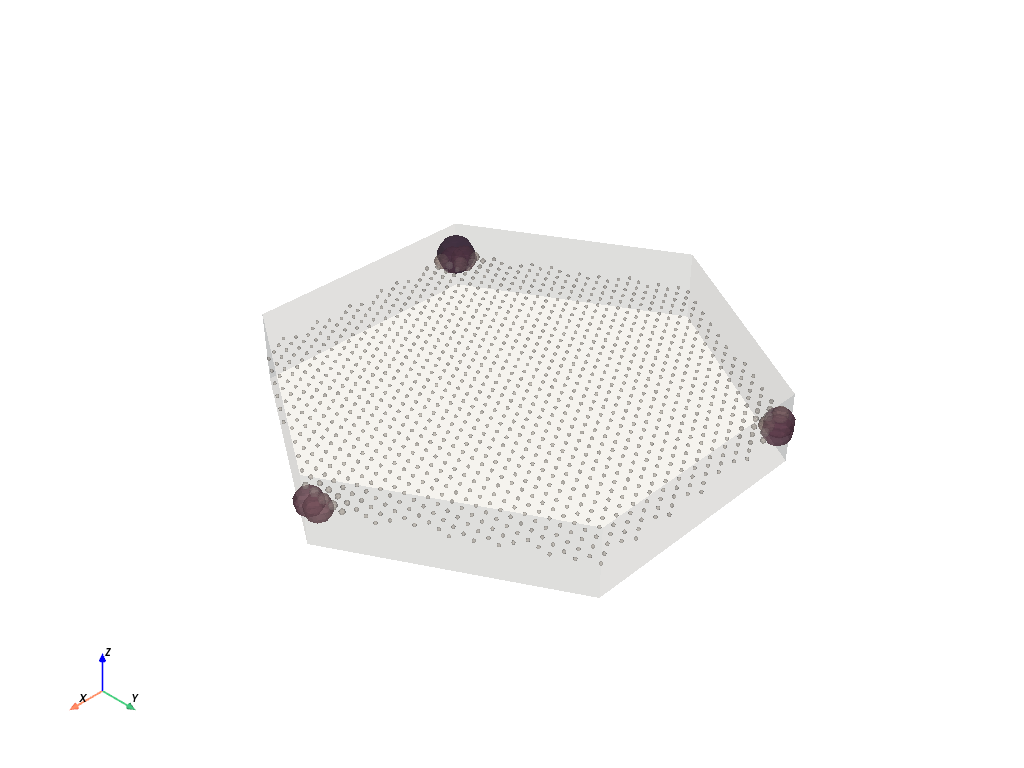

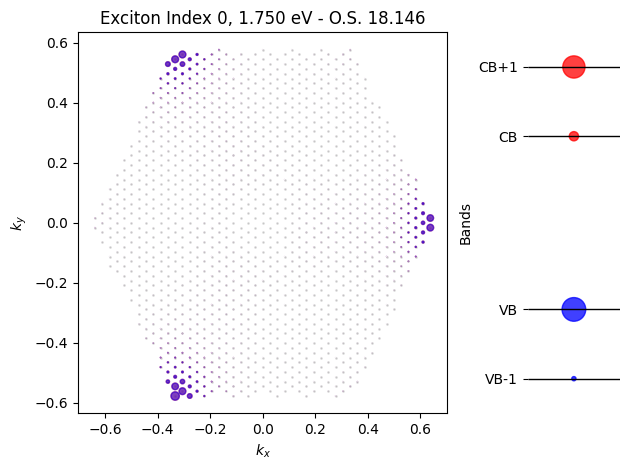

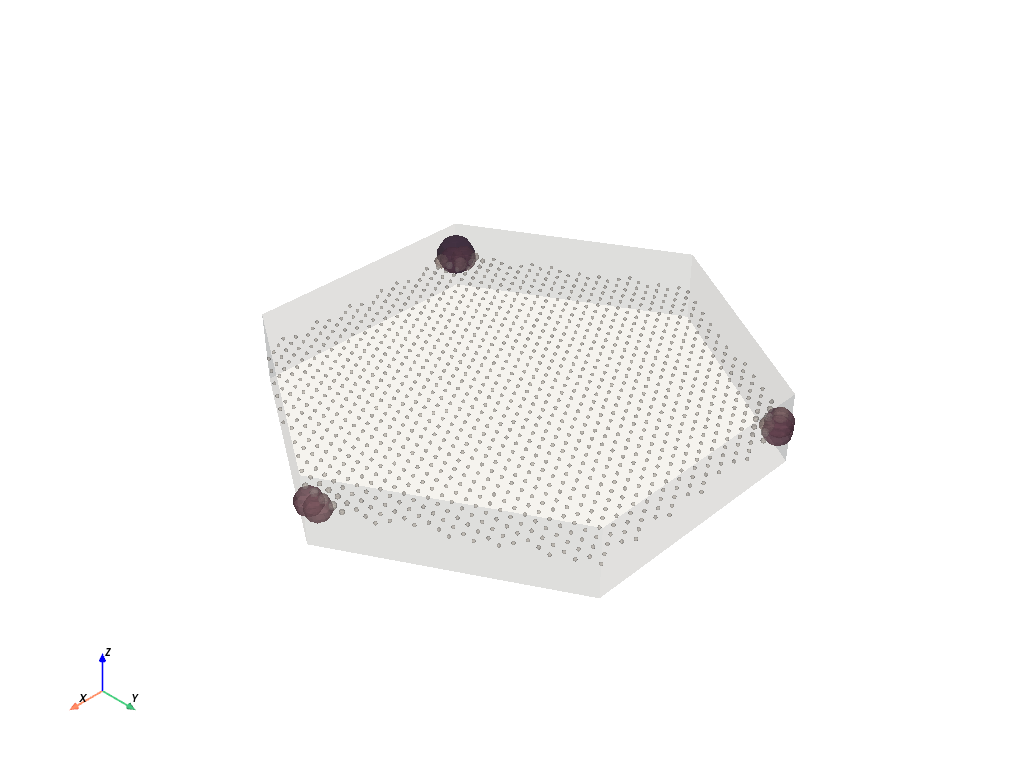

In [11]:
from visualizeBGW.analysis.berkeleygw_processing import get_eigenvectors_components
from visualizeBGW.plotting.berkeleygw_plots import plot_eigenvector_components, plot_eigenvector_k_3d

eigenvectors_file = "12-absorption/eigenvectors.h5"

A_D_index = 0
A_B_index = 2
Ak_A_D, A_c_A_D, A_v_A_D, exciton_header, _ = get_eigenvectors_components(eigenvectors_file, np.array([A_D_index]))
Ak_A_B, A_c_A_B, A_v_A_B, exciton_header, _ = get_eigenvectors_components(eigenvectors_file, np.array([A_B_index]))

fig, ax = plt.subplots()
plot_eigenvector_components(ax, 0, Ak_A_D, A_c_A_D, A_v_A_D, exciton_header, mf_header, eigs[A_D_index], dipole[A_D_index])
plt.show()

pl = pv.Plotter()
plot_eigenvector_k_3d(pl, Ak_A_D, exciton_header, mf_header)
pl.show()

fig, ax = plt.subplots()
plot_eigenvector_components(ax, 0, Ak_A_B, A_c_A_B, A_v_A_B, exciton_header, mf_header, eigs[A_B_index], dipole[A_B_index])
plt.show()

pl = pv.Plotter()
plot_eigenvector_k_3d(pl, Ak_A_B, exciton_header, mf_header)
pl.show()